# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's load MNIST dataset

In [1]:
%tensorflow_version 2.x
import tensorflow

TensorFlow 2.x selected.


In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


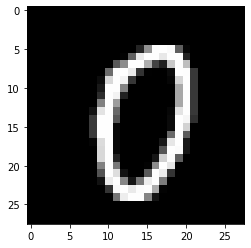

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
#Initializing empty Arrays to store the 2 Datasets
X_train_0_4 = []
y_train_0_4 = []
X_test_0_4 = []
y_test_0_4 = []
X_train_5_9 = []
y_train_5_9 = []
X_test_5_9 = []
y_test_5_9 = []

#Looping through number of records in y_train
for i in range(len(y_train)):
  #If label is less than 5, copy the content to new Dataset having digits from 0 to 4
  if y_train[i] < 5:
    X_train_0_4.append(X_train[i])
    y_train_0_4.append(y_train[i])
  #Else, copy the content to new Dataset having digits from 5 to 9
  else:
    X_train_5_9.append(X_train[i])
    y_train_5_9.append(y_train[i])

#Looping through number of records in y_test
for i in range(len(y_test)):
  #If label is less than 5, copy the content to new Dataset having digits from 0 to 4
  if y_test[i] < 5:
    X_test_0_4.append(X_test[i])
    y_test_0_4.append(y_test[i])
  #Else, copy the content to new Dataset having digits from 5 to 9
  else:
    X_test_5_9.append(X_test[i])
    y_test_5_9.append(y_test[i])

In [0]:
#Import numpy
import numpy as np

#Converting the new Datasets to Array
X_train_0_4 = np.array(X_train_0_4)
y_train_0_4 = np.array(y_train_0_4)
X_test_0_4 = np.array(X_test_0_4)
y_test_0_4 = np.array(y_test_0_4)
X_train_5_9 = np.array(X_train_5_9)
y_train_5_9 = np.array(y_train_5_9)
X_test_5_9 = np.array(X_test_5_9)
y_test_5_9 = np.array(y_test_5_9)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [7]:
#Printing the shape of new Datasets
print("Shape of X_train with digits from 0 to 4 is", X_train_0_4.shape)
print("Shape of y_train with digits from 0 to 4 is", y_train_0_4.shape)
print("Shape of X_test with digits from 0 to 4 is", X_test_0_4.shape)
print("Shape of y_test with digits from 0 to 4 is", y_test_0_4.shape)
print("Shape of X_train with digits from 5 to 9 is", X_train_5_9.shape)
print("Shape of y_train with digits from 5 to 9 is", y_train_5_9.shape)
print("Shape of X_test with digits from 5 to 9 is", X_test_5_9.shape)
print("Shape of y_test with digits from 5 to 9 is", y_test_5_9.shape)

Shape of X_train with digits from 0 to 4 is (30596, 28, 28)
Shape of y_train with digits from 0 to 4 is (30596,)
Shape of X_test with digits from 0 to 4 is (5139, 28, 28)
Shape of y_test with digits from 0 to 4 is (5139,)
Shape of X_train with digits from 5 to 9 is (29404, 28, 28)
Shape of y_train with digits from 5 to 9 is (29404,)
Shape of X_test with digits from 5 to 9 is (4861, 28, 28)
Shape of y_test with digits from 5 to 9 is (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
#Reshaping features of first Dataset
X_train_0_4 = X_train_0_4.reshape(X_train_0_4.shape[0], X_train_0_4.shape[1], X_train_0_4.shape[2], 1)
X_test_0_4 = X_test_0_4.reshape(X_test_0_4.shape[0], X_test_0_4.shape[1], X_test_0_4.shape[2], 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
#Normalizing features of first Dataset
X_train_0_4 = X_train_0_4 / 255
X_test_0_4 = X_test_0_4 / 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [10]:
#Printing shape of X_train for first Dataset
print("Shape of X_train for first Dataset is", X_train_0_4.shape)

#Printing number of images in X_train & X_test for first Dataset
print("Number of Images in X_train for first Dataset is", X_train_0_4.shape[0])
print("Number of Images in X_test for first Dataset is", X_test_0_4.shape[0])

Shape of X_train for first Dataset is (30596, 28, 28, 1)
Number of Images in X_train for first Dataset is 30596
Number of Images in X_test for first Dataset is 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [0]:
#Importing tensorflow
import tensorflow as tf

#Encoding labels of first Dataset
y_train_0_4 = tf.keras.utils.to_categorical(y_train_0_4)
y_test_0_4 = tf.keras.utils.to_categorical(y_test_0_4)

## Question 6
We will build our model by using Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
#Initialize a Sequential model
model = tf.keras.models.Sequential()

#Adding Convolution layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

#Adding Convolution layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

#Adding a Maxpooling Layer of size 2x2
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Adding a Dropout layer with dropout rate of 0.2
model.add(tf.keras.layers.Dropout(0.2))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Add a Flatten Layer
model.add(tf.keras.layers.Flatten())

#Adding a Dense Layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Adding a Dropout Layer
model.add(tf.keras.layers.Dropout(0.2))

#Adding a Dense Layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [14]:
#Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model on first Dataset
model.fit(X_train_0_4, y_train_0_4, 128, 10, validation_data=(X_test_0_4, y_test_0_4))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 5s 151us/sample - loss: 0.5272 - accuracy: 0.8550 - val_loss: 0.1189 - val_accuracy: 0.9654
Epoch 2/10
30596/30596 [==============================] - 2s 57us/sample - loss: 0.1567 - accuracy: 0.9518 - val_loss: 0.0844 - val_accuracy: 0.9755
Epoch 3/10
30596/30596 [==============================] - 2s 57us/sample - loss: 0.1320 - accuracy: 0.9590 - val_loss: 0.0711 - val_accuracy: 0.9796
Epoch 4/10
30596/30596 [==============================] - 2s 56us/sample - loss: 0.1129 - accuracy: 0.9654 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 5/10
30596/30596 [==============================] - 2s 56us/sample - loss: 0.1020 - accuracy: 0.9695 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 6/10
30596/30596 [==============================] - 2s 56us/sample - loss: 0.0922 - accuracy: 0.9715 - val_loss: 0.2483 - val_accuracy: 0.8963
Epoch 7/10
30596/30596 [==============================] 

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [15]:
#Evaluating the trained model on test features & labels for first Dataset
model.evaluate(X_test_0_4, y_test_0_4)

5139/5139 [==============================] - 0s 84us/sample - loss: 0.0332 - accuracy: 0.9901


[0.03315575023916247, 0.9900759]

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing 2 Convolution Neural Network Layers
for layer in model.layers[0:2]:
    layer.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
#Modifying labels for 2nd Dataset by subtracting 5 to match with keras.utils.to_categorical Labels
y_train_5_9 -= 5
y_test_5_9 -= 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
#Reshaping features of second Dataset
X_train_5_9 = X_train_5_9.reshape(X_train_5_9.shape[0], X_train_5_9.shape[1], X_train_5_9.shape[2], 1)
X_test_5_9 = X_test_5_9.reshape(X_test_5_9.shape[0], X_test_5_9.shape[1], X_test_5_9.shape[2], 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
#Normalizing features of second Dataset
X_train_5_9 = X_train_5_9 / 255
X_test_5_9 = X_test_5_9 / 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [20]:
#Printing shape of X_train for second Dataset
print("Shape of X_train for first Dataset is", X_train_5_9.shape)

#Printing number of images in X_train & X_test for second Dataset
print("Number of Images in X_train for first Dataset is", X_train_5_9.shape[0])
print("Number of Images in X_test for first Dataset is", X_test_5_9.shape[0])

Shape of X_train for first Dataset is (29404, 28, 28, 1)
Number of Images in X_train for first Dataset is 29404
Number of Images in X_test for first Dataset is 4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [0]:
#Encoding labels of second Dataset
y_train_5_9 = tf.keras.utils.to_categorical(y_train_5_9)
y_test_5_9 = tf.keras.utils.to_categorical(y_test_5_9)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [22]:
#Fitting the model on second Dataset
model.fit(X_train_5_9, y_train_5_9, 128, 10, validation_data=(X_test_5_9, y_test_5_9))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 63us/sample - loss: 0.4374 - accuracy: 0.8576 - val_loss: 0.2211 - val_accuracy: 0.9276
Epoch 2/10
29404/29404 [==============================] - 2s 58us/sample - loss: 0.2196 - accuracy: 0.9280 - val_loss: 0.1416 - val_accuracy: 0.9537
Epoch 3/10
29404/29404 [==============================] - 2s 56us/sample - loss: 0.1802 - accuracy: 0.9408 - val_loss: 0.1183 - val_accuracy: 0.9613
Epoch 4/10
29404/29404 [==============================] - 2s 56us/sample - loss: 0.1571 - accuracy: 0.9513 - val_loss: 0.1132 - val_accuracy: 0.9595
Epoch 5/10
29404/29404 [==============================] - 2s 55us/sample - loss: 0.1437 - accuracy: 0.9537 - val_loss: 0.0937 - val_accuracy: 0.9673
Epoch 6/10
29404/29404 [==============================] - 2s 56us/sample - loss: 0.1333 - accuracy: 0.9568 - val_loss: 0.0884 - val_accuracy: 0.9691
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [23]:
#Evaluating the trained model on test features & labels for second Dataset
model.evaluate(X_test_5_9, y_test_5_9)

4861/4861 [==============================] - 0s 81us/sample - loss: 0.0690 - accuracy: 0.9761


[0.06904734532289226, 0.9761366]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
#Importing Pandas
import pandas as pd

#Reading tweets.csv with latin encoding
df= pd.read_csv('tweets.csv', encoding='latin')

### Drop null values
- drop all the rows with null values

In [0]:
#Dropping rows with null values
df.dropna(inplace=True)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [26]:
#Printing initial 5 rows of the data
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
#Importing re library for Regular Expression Engibe
import re

#Keeping only Alphanumeric valus & special characters #, + & _
df['tweet_text'] = df['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))

#Lower casing & stripping
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.lower().strip())

print dataframe

In [28]:
#Print initial 5 rows of the Data
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [29]:
#Selecting only those rows where value equal to "Positive emotion" or "Negative emotion" for column 'is_there_an_emotion_directed_at_a_brand_or_product'
df2 = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion") | (df['is_there_an_emotion_directed_at_a_brand_or_product'] == "Negative emotion")]

#Finding value counts
df2['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
#Changinf "Positive emotion" to 1 and "Negative emotion" to 0
df2['is_there_an_emotion_directed_at_a_brand_or_product'] = df2['is_there_an_emotion_directed_at_a_brand_or_product'].map({"Positive emotion":1, "Negative emotion": 0})

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
#Getting column 'tweet_text' as Feature
X = df2['tweet_text']

#Getting column 'is_there_an_emotion_directed_at_a_brand_or_product' as Label
y = df2['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
#Importing train_test_split function from module model_selection in library sklearn
from sklearn.model_selection import train_test_split

#Doing a train test split with test_size of 0.25 & a random_state of 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
#Importing CountVectorizer function from feature_extraction.text submodule in sklearn library
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
vectorizer = CountVectorizer(min_df=2, stop_words='english', ngram_range=(1,2))

#Creating document-term matrix
X_train_vect = vectorizer.fit_transform(X_train)

In [0]:
#Doing transform on X_test
X_test_vect = vectorizer.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
#Importing LogisticRegression function from linear_model module in sklearn library
from sklearn.linear_model import LogisticRegression

#Initializing Logistic Regression classifier
model = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [36]:
#Fitting Logistic regression Classifier
model.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
#Importing MultinomialNB function from module naive_bayes in sklearn library
from sklearn.naive_bayes import MultinomialNB

#Initializing MultinomialNB classifier
model2 = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [38]:
#Fitting Naive Bayes classifier
model2.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
#Using trained Logistic Regression model to make predictions on X_test
y_pred = model.predict(X_test_vect)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
#Using trained Naive Bayes model to make predictions on X_test
y_pred2 = model2.predict(X_test_vect)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [41]:
#Importing acuracy_score function from metrics module in sklearn library
from sklearn.metrics import accuracy_score

#Checking accuracy of Logistic Regression Classifier
accuracy_score(y_test, y_pred)

0.8596491228070176

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [42]:
#Checking accuracy of Naive Bayes Classifier
accuracy_score(y_test, y_pred2)

0.8583959899749374